In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../../lib")

In [89]:
import matplotlib.pyplot as plt
import numpy as np
import temporal_encoder_common
import basis_delay_analysis_common
from temporal_encoder_common import Filters
import nonneg_common
import lif_utils
import nengo
import dlop_ldn_function_bases as bases

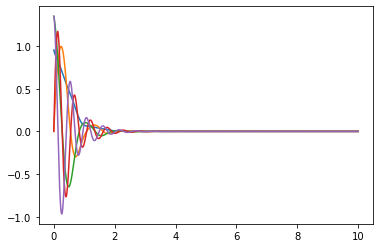

In [90]:
q = 5
T, dt = 10.0, 1e-3
ts = np.arange(0, T, dt)

ts, Ms = basis_delay_analysis_common.mk_impulse_response("mod_fourier", "bartlett", q=q, dt=dt)

fig, ax = plt.subplots()
ax.plot(ts, Ms);

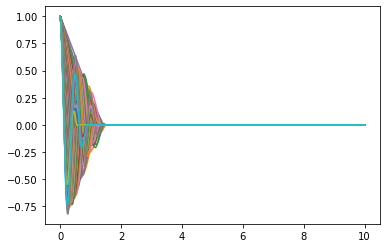

In [51]:
q = 100
N_theta = int(1.0 / dt)
Ms = np.zeros((len(ts), q))
f_max = 2.0 #0.5 * (q - 1)  # Maximum frequency to use
phis = np.linspace(0, 2.0 * np.pi * f_max, q)
for i in range(q):
    decay = int(np.random.uniform(N_theta * 0.5,
                                  N_theta * 1.5))  # +-50%
    Ms[:decay,
       i] = np.cos(phis[i] * ts[:decay]) * np.linspace(
           1, 0, decay)

fig, ax = plt.subplots()
ax.plot(ts, Ms);

[-0.1968086   0.13376221 -0.35888407 -0.10767456  0.74889301]
[-0.1968086   0.13376221 -0.35888407 -0.10767456  0.74889301]
[ 0.17133184 -0.36311084  0.09182338 -0.61040162 -0.17923009]
[ 0.17133184 -0.36311084  0.09182338 -0.61040162 -0.17923009]
[ 0.36835378  0.42755689  0.54060238  0.22003702 -0.48181387]
[ 0.36835378  0.42755689  0.54060238  0.22003702 -0.48181387]


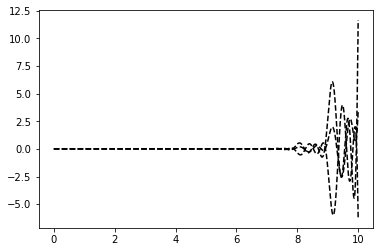

In [156]:
fig, ax = plt.subplots()

for i in range(1, 4):
    #rng = np.random.RandomState(578287 + i)
    #xs = temporal_encoder_common.mk_sig(len(ts), dt, sigma=1.0, rng=rng)

    rng = np.random.RandomState(578287 + i)
    xs_biased = temporal_encoder_common.mk_sig(len(ts), dt, sigma=1.0, Ms=Ms, i_smpl=i, biased=True, rng=rng)

#    print(np.array([np.convolve(xs_biased, Ms[:, j], 'valid') * dt for j in range(q)]))
    print(np.array([np.sum(xs_biased * Ms[::-1, j]) * dt for j in range(q)]))
    
    #ax.plot(ts, xs, 'k')
    ax.plot(ts, xs_biased, 'k--')